In [1]:
import imblearn
import pymysql
from sqlalchemy import create_engine
import pandas as pd
import numpy as np
import getpass
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
password = getpass.getpass()

········


In [2]:
DataChurn= pd.read_csv('../lab-imbalanced-data/files_for_lab/customer_churn.csv')

In [3]:
DataChurn.shape

(7043, 21)

In [4]:
DataChurn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
DataChurn

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
DataSelection=DataChurn[['SeniorCitizen','tenure','MonthlyCharges','Churn']]

In [7]:
DataSelection.isna

<bound method DataFrame.isna of       SeniorCitizen  tenure  MonthlyCharges Churn
0                 0       1           29.85    No
1                 0      34           56.95    No
2                 0       2           53.85   Yes
3                 0      45           42.30    No
4                 0       2           70.70   Yes
...             ...     ...             ...   ...
7038              0      24           84.80    No
7039              0      72          103.20    No
7040              0      11           29.60    No
7041              1       4           74.40   Yes
7042              0      66          105.65    No

[7043 rows x 4 columns]>

In [8]:
DataSelection.isna().sum()

SeniorCitizen     0
tenure            0
MonthlyCharges    0
Churn             0
dtype: int64

In [9]:
DataSelection.dtypes

SeniorCitizen       int64
tenure              int64
MonthlyCharges    float64
Churn              object
dtype: object

In [10]:
DataSelection['SeniorCitizen'].value_counts()

0    5901
1    1142
Name: SeniorCitizen, dtype: int64

In [11]:
DataSelection['SeniorCitizen'] = DataSelection['SeniorCitizen'].astype('object') 

<ipython-input-11-4ea20fb02803>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  DataSelection['SeniorCitizen'] = DataSelection['SeniorCitizen'].astype('object')


In [12]:
DataSelection['SeniorCitizen'].value_counts

<bound method IndexOpsMixin.value_counts of 0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: SeniorCitizen, Length: 7043, dtype: object>

In [13]:
X = DataSelection.drop('Churn', axis=1)
y = DataSelection['Churn']

In [14]:
DataSelection['tenure'].unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

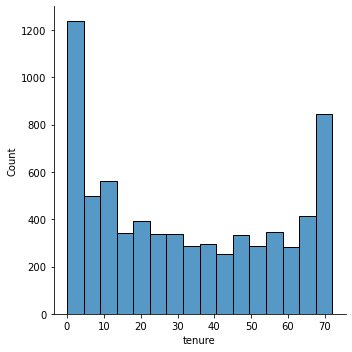

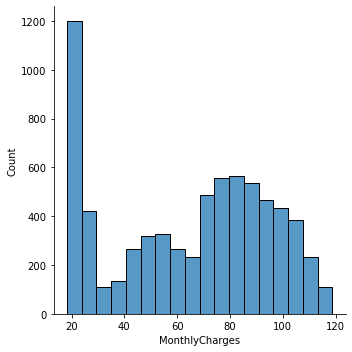

In [15]:
for col in DataSelection.select_dtypes(np.number):
    sns.displot(DataSelection[col])
    plt.show()

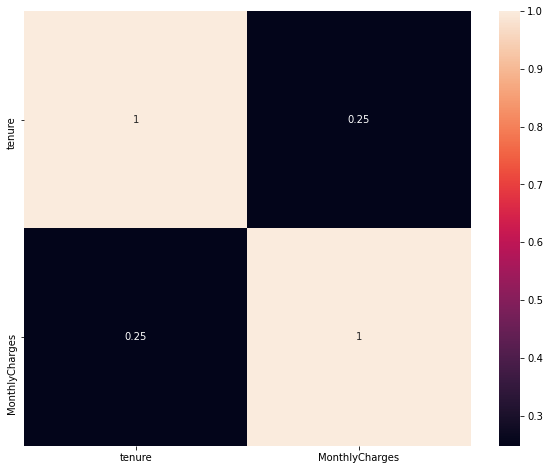

In [16]:
corr_matrix=DataSelection.corr(method='pearson')  # default
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(corr_matrix, annot=True)
plt.show()

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

y_train.value_counts()

No     4139
Yes    1495
Name: Churn, dtype: int64

In [18]:
data_train= pd.concat([X_train, y_train], axis=1) 

In [19]:
data_train['SeniorCitizen'].value_counts() 

0    4714
1     920
Name: SeniorCitizen, dtype: int64

In [20]:
data_train['Churn'].value_counts()

No     4139
Yes    1495
Name: Churn, dtype: int64

In [21]:
A = data_train[data_train['SeniorCitizen'] == 0].sample(4500) 
B = data_train[data_train['SeniorCitizen'] == 1].sample(4500, replace=True)


In [22]:
upsampled = pd.concat([A, B]).sample(frac=1) 
upsampled

,SeniorCitizen,tenure,MonthlyCharges,Churn
738,1,42,79.35,No
2344,1,14,39.70,No
1086,1,11,89.70,Yes
5703,1,72,25.40,No
1257,1,45,34.20,No
...,...,...,...,...
3585,1,34,90.15,No
591,0,46,24.90,No
1032,1,8,92.10,Yes
2741,1,5,89.50,Yes


In [23]:
#from sklearn.preprocessing import MinMaxScaler

#numericals = data.select_dtypes(np.number)

#transformer = MinMaxScaler().fit(numericals)
#x_min_max = transformer.transform(numericals)
#x_min_max

In [24]:
X_train = upsampled.drop('Churn', axis=1)
y_train = upsampled['Churn']

In [25]:
classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_train, y_train)

LogisticRegression(max_iter=10000, random_state=42)

In [26]:
classification.score(X_test, y_test)

0.7849538679914834

In [27]:
predictions = classification.predict(X_test)
confusion_matrix(y_test, predictions)

array([[940,  95],
       [208, 166]])

In [29]:
from sklearn.metrics import classification_report
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n          No       0.82      0.91      0.86      1035\n         Yes       0.64      0.44      0.52       374\n\n    accuracy                           0.78      1409\n   macro avg       0.73      0.68      0.69      1409\nweighted avg       0.77      0.78      0.77      1409\n'

##### Upsampling gave a recall in Nos from 91%. and a bad recall of Yes' of 44%
##### and a R^2 score of 78%

### Smote

In [30]:
# SMOTE
# Uses knn to create rows with similar features from the minority classes.
from imblearn.over_sampling import SMOTE

smote = SMOTE()

#X = DataSelection.drop('Churn', axis=1)
#y = DataSelection['Churn']

X_sm, y_sm = smote.fit_resample(X_train, y_train)
y_sm.value_counts() 

No     6001
Yes    6001
Name: Churn, dtype: int64

In [31]:
classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_sm, y_sm)

LogisticRegression(max_iter=10000, random_state=42)

In [32]:
classification.score(X_test, y_test)  

0.7551454932576295

In [33]:
predictions = classification.predict(X_test)
confusion_matrix(y_test, predictions)

array([[812, 223],
       [122, 252]])

In [35]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n          No       0.87      0.78      0.82      1035\n         Yes       0.53      0.67      0.59       374\n\n    accuracy                           0.76      1409\n   macro avg       0.70      0.73      0.71      1409\nweighted avg       0.78      0.76      0.76      1409\n'

#### The Smote technique gave recall of No's from 78% and compared to the upsampling a much better 
#### of the yes from 67%
#### (R^2 score of 76%)

### TomekLinks

In [36]:
from imblearn.under_sampling import TomekLinks
X = DataSelection.drop('Churn', axis=1)
y = DataSelection['Churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

y_train.value_counts()



No     4139
Yes    1495
Name: Churn, dtype: int64

In [37]:
tomek = TomekLinks()
X_tl, y_tl = tomek.fit_resample(X_train, y_train)
y_tl.value_counts()

No     3764
Yes    1495
Name: Churn, dtype: int64

In [38]:
classification = LogisticRegression(random_state=42, max_iter=10000)
classification.fit(X_tl, y_tl)

LogisticRegression(max_iter=10000, random_state=42)

In [39]:
classification.score(X_test, y_test)  

0.7778566359119943

In [40]:
predictions = classification.predict(X_test)
confusion_matrix(y_test, predictions)

array([[896, 139],
       [174, 200]])

In [41]:
classification_report(y_test, predictions)

'              precision    recall  f1-score   support\n\n          No       0.84      0.87      0.85      1035\n         Yes       0.59      0.53      0.56       374\n\n    accuracy                           0.78      1409\n   macro avg       0.71      0.70      0.71      1409\nweighted avg       0.77      0.78      0.77      1409\n'

#### TomekLink gave a recall of the No's from 87% and a recall of Yes from 53%, R^2 score of 78%

### the Smote technique gave the best improvement in the recall for the minor Yes fraction of data (with some little worse recall in the No's)

#### the TomekLink gave us a good R^2 score with the second best recall for the Yes'